<a href="https://colab.research.google.com/github/sagar2582/TensorFlow/blob/main/02_Neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to neural network classification with TensorFlow

## Creating data to view and fit


In [1]:
from sklearn.datasets import make_circles

# Make 100 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


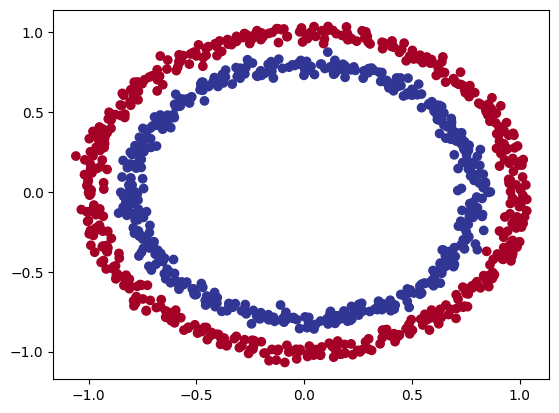

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [6]:
## Input and output shapes of our neural networks
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [9]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# Create a model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.1235 - accuracy: 0.4780
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.6368 - accuracy: 0.4650
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2440 - accuracy: 0.4720
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 2.8446 - accuracy: 0.4760
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7441 - accuracy: 0.4920


In [10]:
# improving our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)

In [11]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Adding an extra layer


In [12]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000


[0.693374752998352, 0.5]

## Improving our model

In [13]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.5090


[0.7007918953895569, 0.5090000033378601]

### Let's create a function to visualize our model.

In [14]:
from numpy.core.fromnumeric import shape
import numpy as np

def plot_decision_boundry(model, X, y):
  '''
  Plots the decision boundary created by a model predicting on X.
  '''
  # Define the  axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
               
  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predcitions to get them ready for plotting 
    y_pred = np.argsmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


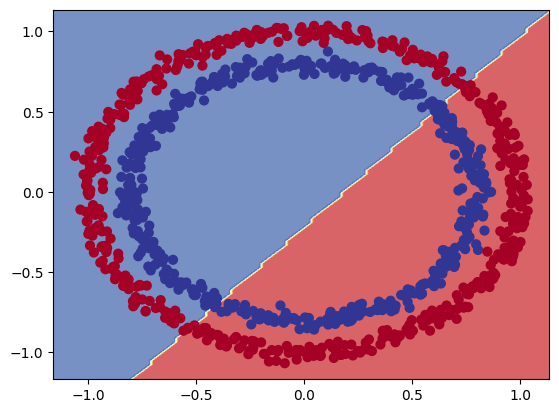

In [15]:
# Check out the predictions our model is making 
plot_decision_boundry(model=model_3,
                      X=X,
                      y=y)

In [16]:
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

## The missing piece : Non-linearity

In [17]:
# Set the random seed 
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.7108 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6955 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6903 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6700 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6380 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6345 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6136 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5530 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5393 - accuracy: 0.4780
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5349 - accuracy: 0.4800
Epoch 11/

In [18]:
# Time to replicate the multilayer neural network from TensorFlow playgrounds

# Set the random seed
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [19]:
# Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classification


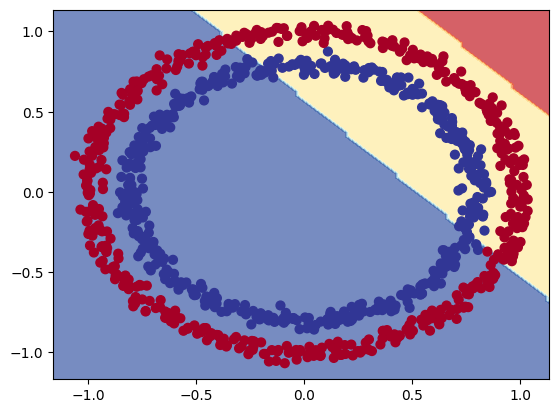

In [20]:
plot_decision_boundry(model_5, X, y)

In [21]:
# Changing/adding the activation in the output layer
tf.random.set_seed(42)
# Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")      # Sigmoid for Binary Classification, softmax is used for multi-class classification
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs=150)

Epoch 1/150
32/32 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.4980
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5060
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5040
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5030
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5020
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5030
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5010
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5010
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5030
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


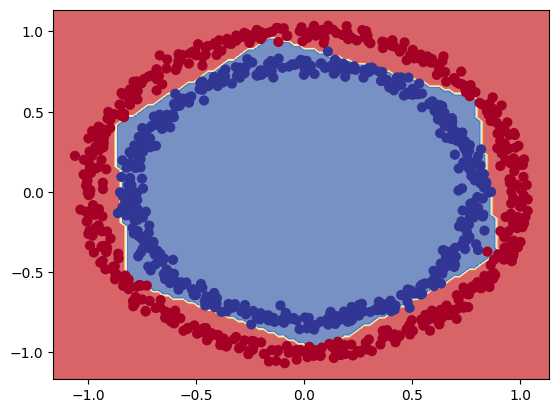

In [22]:
plot_decision_boundry(model_6, X, y)

In [23]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1974 - accuracy: 0.9860


[0.197372704744339, 0.9860000014305115]

Are we evaluating our model correctly?

In [24]:
# Create a toy tensor (similar to the data we passed into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

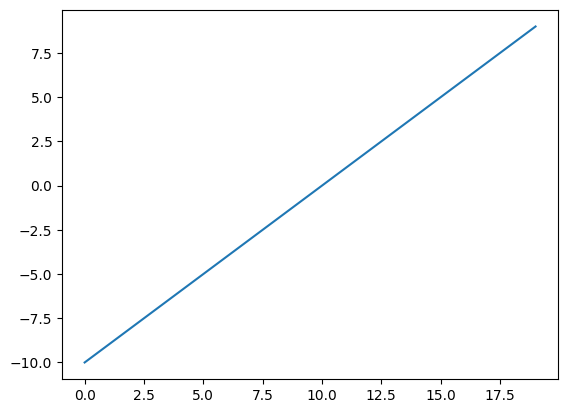

In [25]:
# Visualize our toy tensor
plt.plot(A);

In [26]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sogmoid on toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

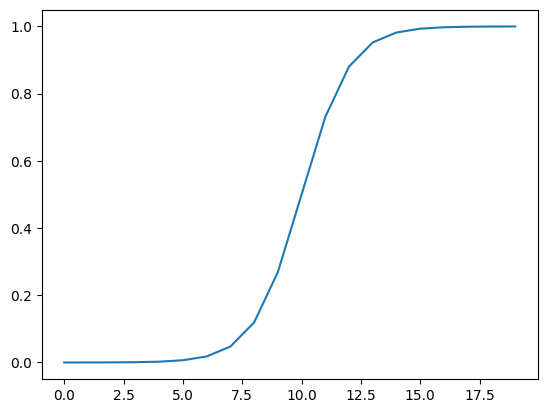

In [27]:
plt.plot(sigmoid(A));

In [28]:
# Build a ReLu function
def relu(x):
  return tf.maximum(0, x)

# passing toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

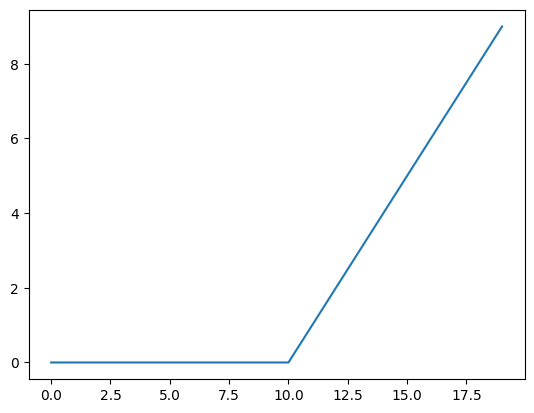

In [29]:
plt.plot(relu(A));

## Evaluating and improving our classification model

Let's create training and test sets


In [30]:
len(X)

1000

In [31]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [32]:
# Let recreate a mdel on the training data and evaulate on the test sets

# Set the random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model 
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6955 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5250
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5180
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6020
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.6600
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7390
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7570
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.8060
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.8500
Epoch 11/

In [33]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000


[0.005951403174549341, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification


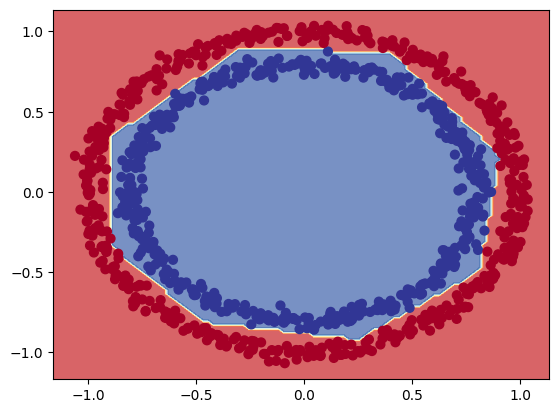

In [34]:
plot_decision_boundry(model_7, X, y)

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


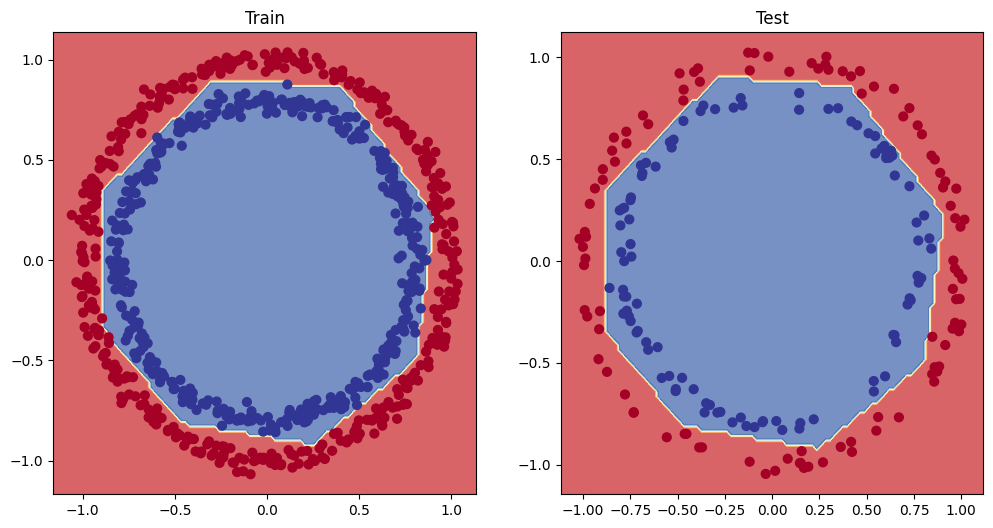

In [35]:
# Checking on the test dataset

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundry(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundry(model_7, X=X_test, y=y_test)
plt.show();

In [36]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 1.0000


[0.0034844400361180305, 1.0]

## Using TensorFlow History object to plot a model's loss curve

In [38]:
# Convert history object into a DataFrame

pd.DataFrame(history.history)

,loss,accuracy
0,0.695530,0.501
1,0.689495,0.525
2,0.684029,0.518
3,0.677040,0.583
4,0.665150,0.602
...,...,...
95,0.007584,0.999
96,0.015247,0.995
97,0.010595,0.999
98,0.009393,0.998


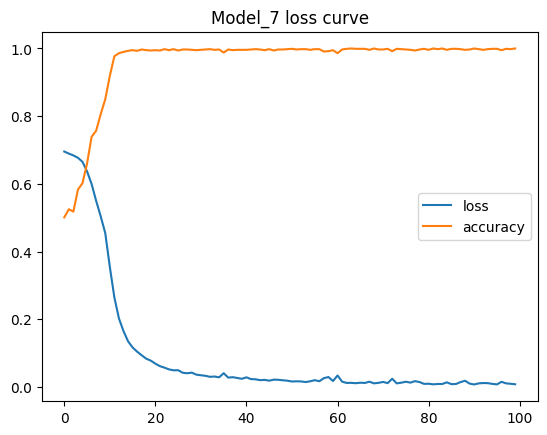

In [40]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_7 loss curve");

### Using callbacks to find a model's ideal learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality you can add to your model *while* its training.

* A modified loss curves plot.

In [42]:
# Set the random seed'
tf.random.set_seed(42)

# Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# lr-Callback - A callback works during model training, so to run during model training it has to exist before model training.
# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_8 = model_8.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7711 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7685 - accuracy: 0.4837 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7658 - accuracy: 0.4338 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7627 - accuracy: 0.4787 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7595 - accuracy: 0.4812 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7562 - accuracy: 0.4737 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7526 - accuracy: 0.4762 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7490 - accuracy: 0.4762 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

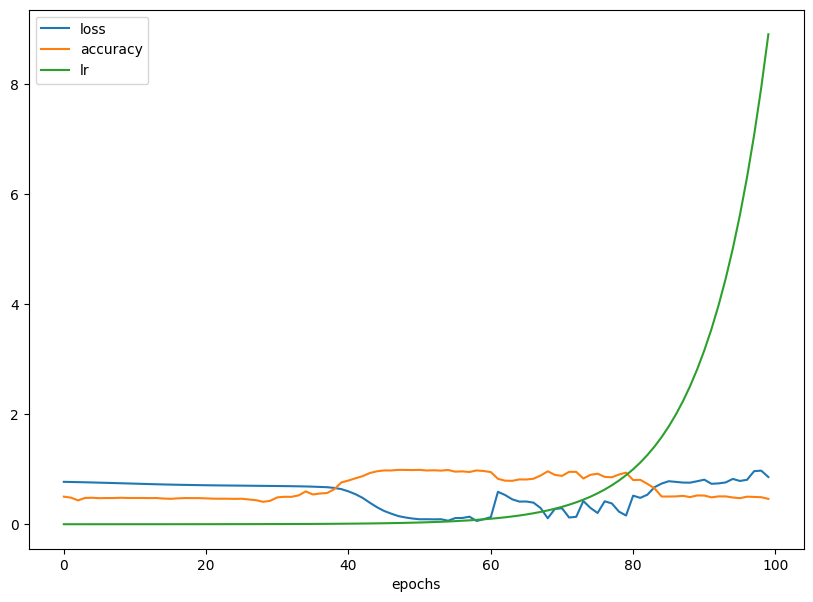

In [45]:
pd.DataFrame(history_8.history).plot(figsize=(10, 7), xlabel = "epochs");

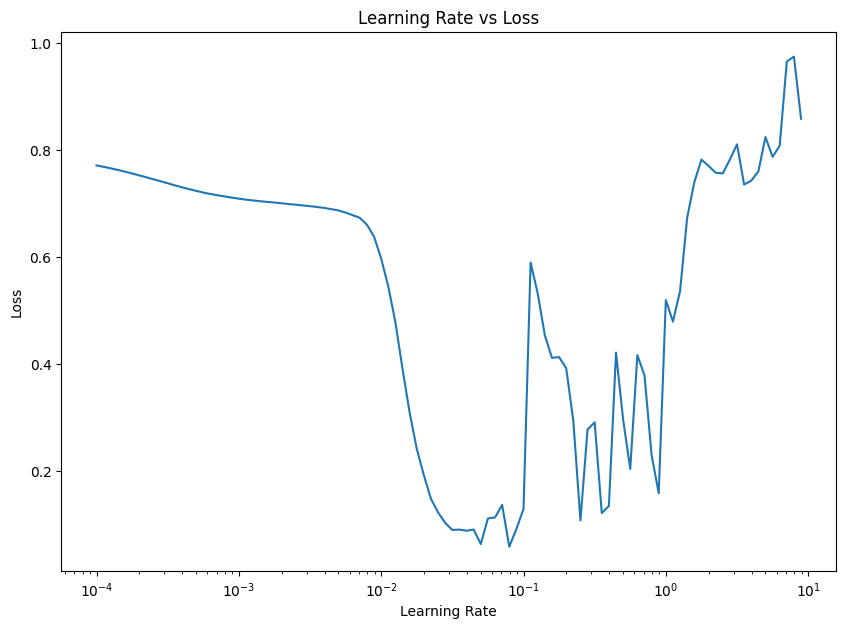

In [51]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
# Semilogx() plot - this just means we want log on the 'x' scale
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

In [49]:
len(lrs)

100

In [ ]:
## More classification evaluation methods

